In [22]:
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Total images loaded: 5856
Category counts:
TRAIN/NORMAL: 1341
TRAIN/PNEUMONIA: 3875
TEST/NORMAL: 234
TEST/PNEUMONIA: 390
VAL/NORMAL: 8
VAL/PNEUMONIA: 8


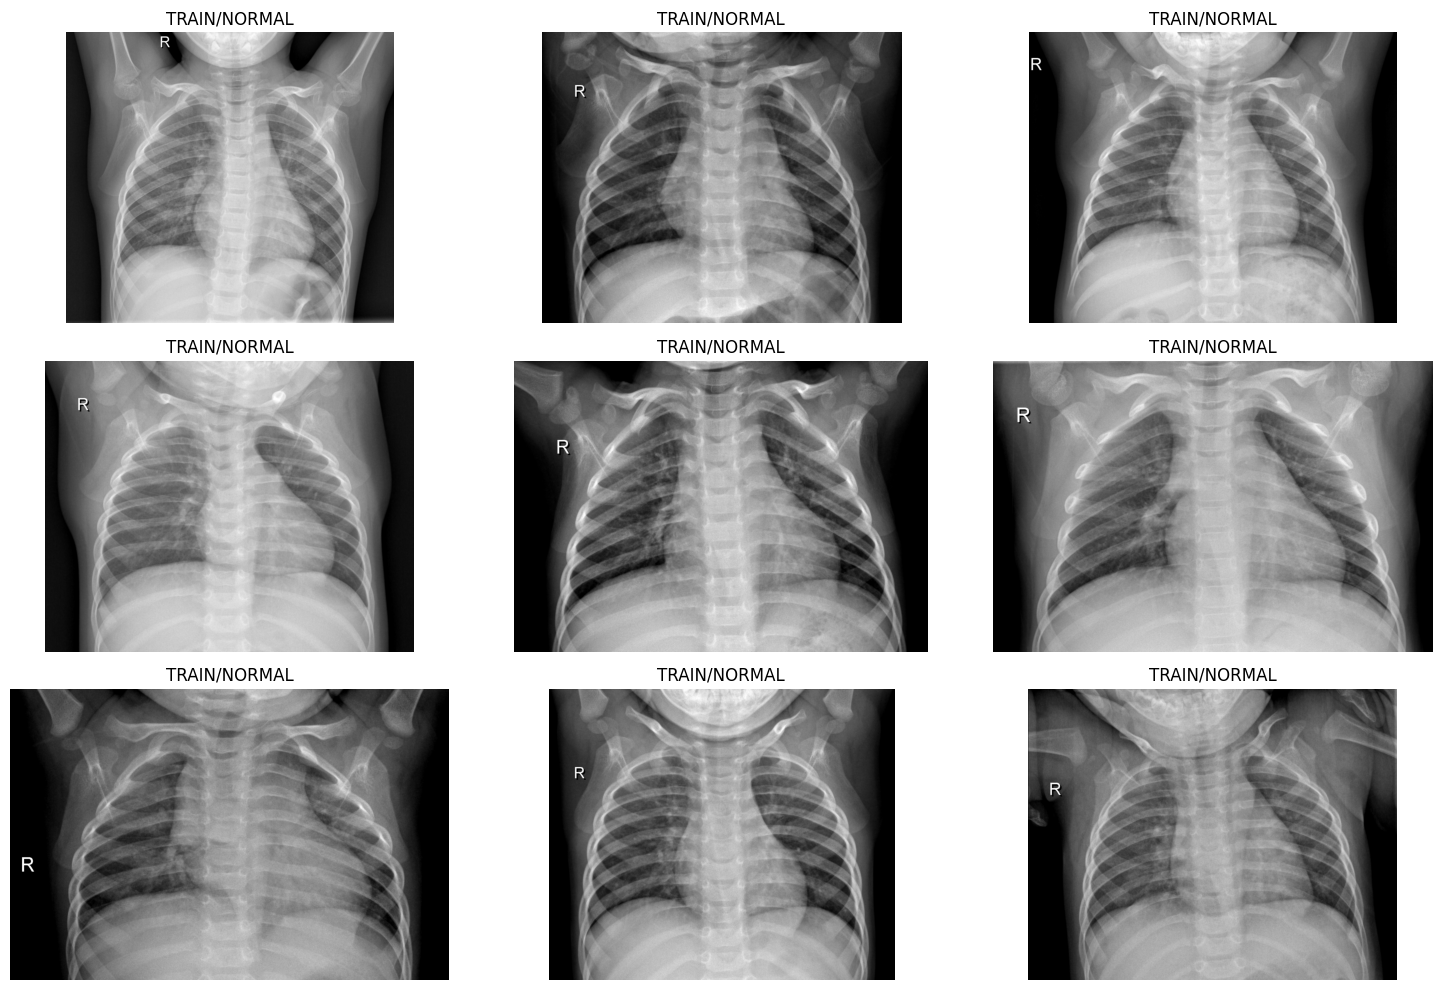

In [23]:
# Define dataset path
base_path = r'C:\Users\venur\pneumonia_xray_project\data\raw\chest_xray'

# Function to load all images recursively with labels
def load_full_dataset(base_path):
    all_images = []
    for dataset_type in ["train", "test", "val"]:  # Include validation if exists
        dataset_path = os.path.join(base_path, dataset_type)
        if not os.path.exists(dataset_path):
            continue
        # Loop over categories (NORMAL, PNEUMONIA, etc.)
        for label in os.listdir(dataset_path):
            label_path = os.path.join(dataset_path, label)
            if not os.path.isdir(label_path):
                continue
            # Load all images in this label folder
            for img_file in glob(os.path.join(label_path, "*")):
                try:
                    img = Image.open(img_file)
                    all_images.append((img, label.upper(), dataset_type.upper(), img_file))
                except Exception as e:
                    print(f"Error loading {img_file}: {e}")
    return all_images

# Load dataset
dataset = load_full_dataset(base_path)
print(f"Total images loaded: {len(dataset)}")

# Optional: count per category
from collections import Counter
category_counts = Counter((label, dataset_type) for _, label, dataset_type, _ in dataset)
print("Category counts:")
for (label, dataset_type), count in category_counts.items():
    print(f"{dataset_type}/{label}: {count}")

# Optional: display sample images
plt.figure(figsize=(15, 10))
for i, (img, label, dataset_type, path) in enumerate(dataset[:9]):  # show first 9
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{dataset_type}/{label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
# Step 1 : Data Cleaning

import os

# Reuse your dataset path
base_path = r'C:\Users\venur\pneumonia_xray_project\data\raw\chest_xray'

# Step 1: Check image extensions
valid_extensions = ('.png', '.jpg', '.jpeg')

def clean_dataset(base_path):
    removed_files = []
    for dataset_type in ["train", "test", "val"]:
        dataset_path = os.path.join(base_path, dataset_type)
        if not os.path.exists(dataset_path):
            continue
        for label in os.listdir(dataset_path):
            label_path = os.path.join(dataset_path, label)
            if not os.path.isdir(label_path):
                continue
            for f in os.listdir(label_path):
                fpath = os.path.join(label_path, f)
                if not f.lower().endswith(valid_extensions):
                    os.remove(fpath)  # remove non-image files
                    removed_files.append(fpath)
    return removed_files

removed = clean_dataset(base_path)
print(f"Removed {len(removed)} non-image files")


Removed 0 non-image files


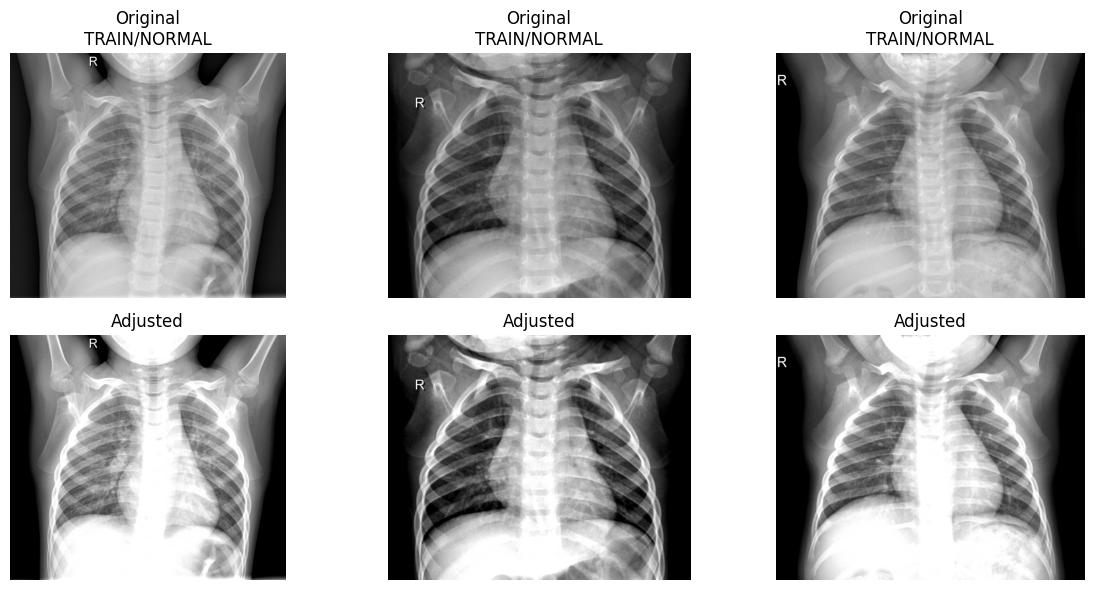

In [25]:
# Preprocessing : Contrast & Brightness Adjustment

from PIL import ImageEnhance

def adjust_contrast_brightness(img, contrast_factor=1.3, brightness_factor=1.2):
    """
    Adjusts contrast and brightness for a given image
    """
    # Contrast adjustment
    img = ImageEnhance.Contrast(img).enhance(contrast_factor)
    # Brightness adjustment
    img = ImageEnhance.Brightness(img).enhance(brightness_factor)
    return img

# Example: Apply to first 3 images in dataset
sample_images = dataset[:3]

plt.figure(figsize=(12,6))
for i, (img, label, dtype, path) in enumerate(sample_images):
    adjusted = adjust_contrast_brightness(img)
    
    # Show original
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Original\n{dtype}/{label}")
    plt.axis("off")
    
    # Show adjusted
    plt.subplot(2, 3, i+1+3)
    plt.imshow(adjusted, cmap="gray")
    plt.title("Adjusted")
    plt.axis("off")

plt.tight_layout()
plt.show()


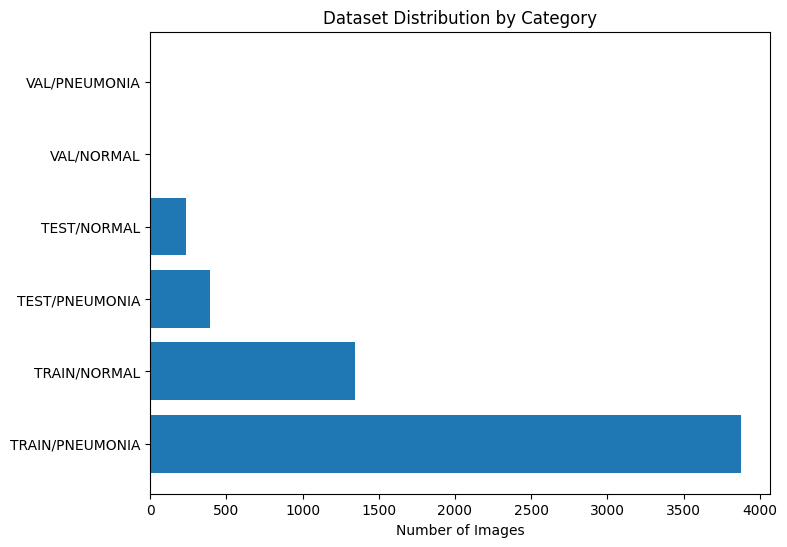

In [29]:
#  EDA: Category Distribution
import pandas as pd
from collections import Counter

# Convert dataset into DataFrame for easy analysis
data_records = [(label, dtype) for _, label, dtype, _ in dataset]
df = pd.DataFrame(data_records, columns=["Label", "Dataset_Type"])

# Count by category
counts = df.value_counts().reset_index(name="Count")

plt.figure(figsize=(8,6))
plt.barh(counts["Dataset_Type"] + "/" + counts["Label"], counts["Count"])
plt.xlabel("Number of Images")
plt.title("Dataset Distribution by Category")
plt.show()

Average width: 1327.88, Average height: 970.69


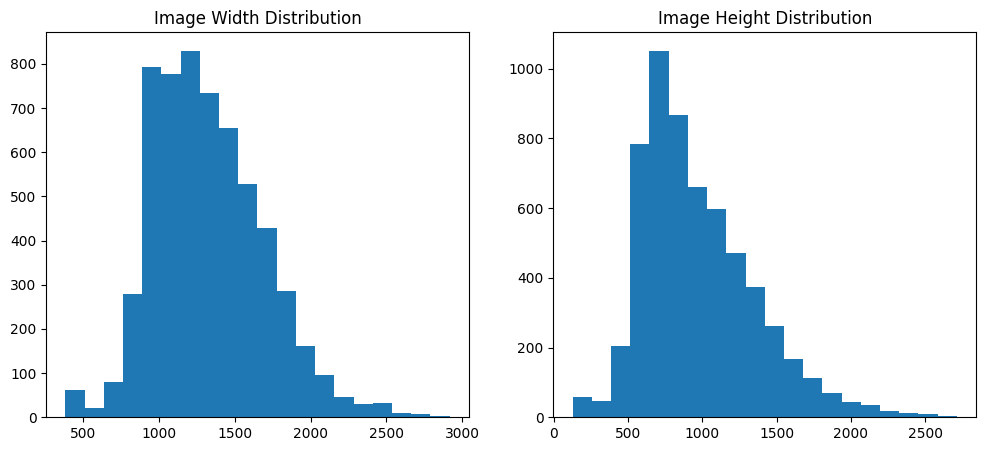

In [30]:
# EDA: Image Size Statistics 
sizes = []
for img, _, _, _ in dataset:
    sizes.append(img.size)  # (width, height)

widths = [w for w,h in sizes]
heights = [h for w,h in sizes]

print(f"Average width: {np.mean(widths):.2f}, Average height: {np.mean(heights):.2f}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(widths, bins=20)
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
plt.hist(heights, bins=20)
plt.title("Image Height Distribution")

plt.show()


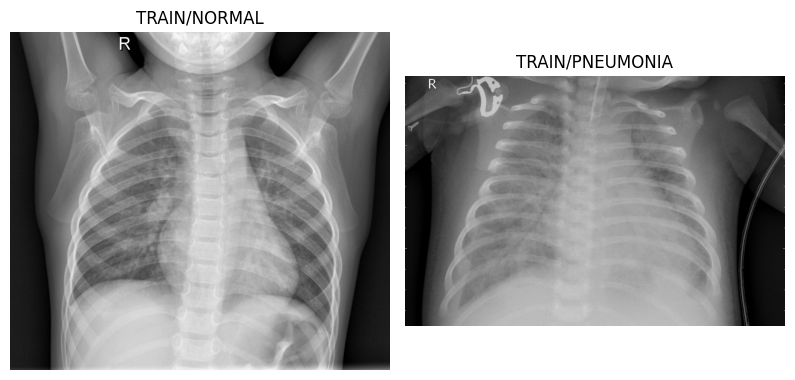

In [31]:
#  EDA: Sample Images by Category 
categories = df["Label"].unique()

plt.figure(figsize=(12, 8))
for i, cat in enumerate(categories[:6]):  # show max 6 categories
    # pick one image from each category
    img, label, dtype, path = next((x for x in dataset if x[1] == cat), None)
    if img:
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{dtype}/{label}")
        plt.axis("off")

plt.tight_layout()
plt.show()
